In [53]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize

In [54]:
#Loads the data from the scattered spectrum for the angle in question

channel, E, N = np.loadtxt('Archive/120_scatt_0512.tsv', unpack=True, skiprows=25)

dN = np.sqrt(N)
for i, value in enumerate(dN):
    if value == 0:
        dN[i] = 1.14

In [55]:
#Loads the data from the background spectrum for the angle in question

channel_bkg, E_bkg, N_bkg = np.loadtxt('Archive 2/120_bkg_0512.tsv', unpack=True, skiprows=25)

N_bkg = N_bkg/1277.4*2040.02

dN_bkg = np.sqrt(N_bkg)
for i, value in enumerate(dN_bkg):
    if value == 0:
        dN_bkg[i] = 1.14

In [56]:
#Subtracts the background from the scattered spectrum

N_bkg_sub = N - (N_bkg)

dN_bkg_sub = np.sqrt(N+N_bkg)
for i, value in enumerate(dN_bkg_sub):
    if value == 0:
        dN_bkg_sub[i] = 1.14
        


<IPython.core.display.Javascript object>


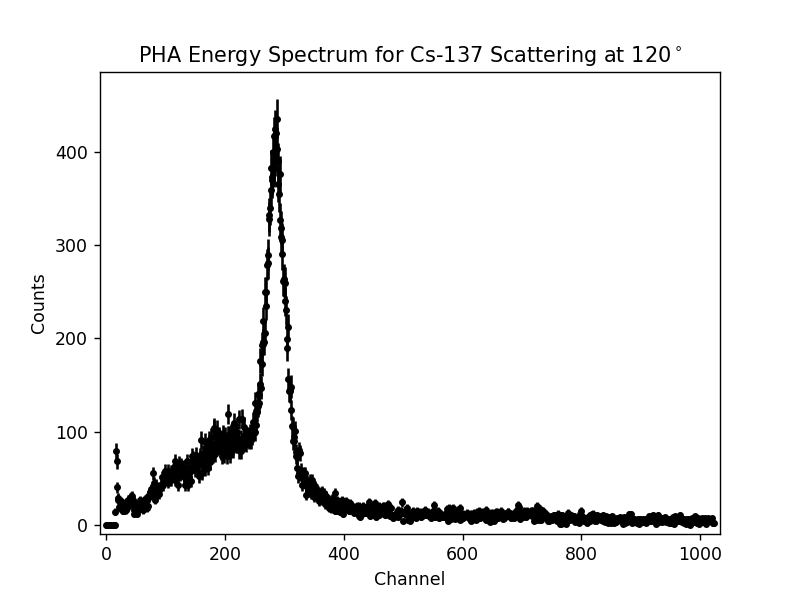

In [57]:
#Plots the scattered spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, N, dN, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering at 120$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_120_scatt_0512.pdf')
plt.show()

<IPython.core.display.Javascript object>


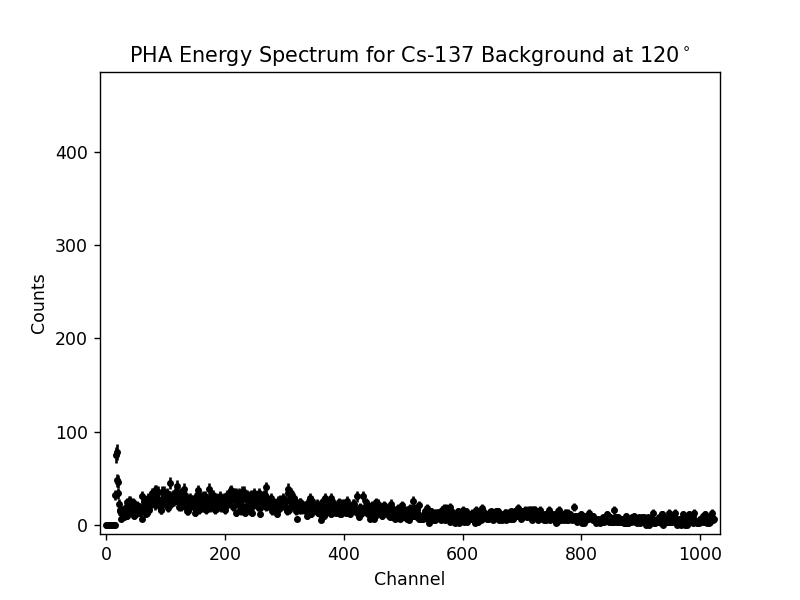

In [58]:
#Plots the background spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel_bkg, N_bkg, dN_bkg, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N_bkg)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Background at 120$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_120_scatt_0512_bkg.pdf')
plt.show()

<IPython.core.display.Javascript object>


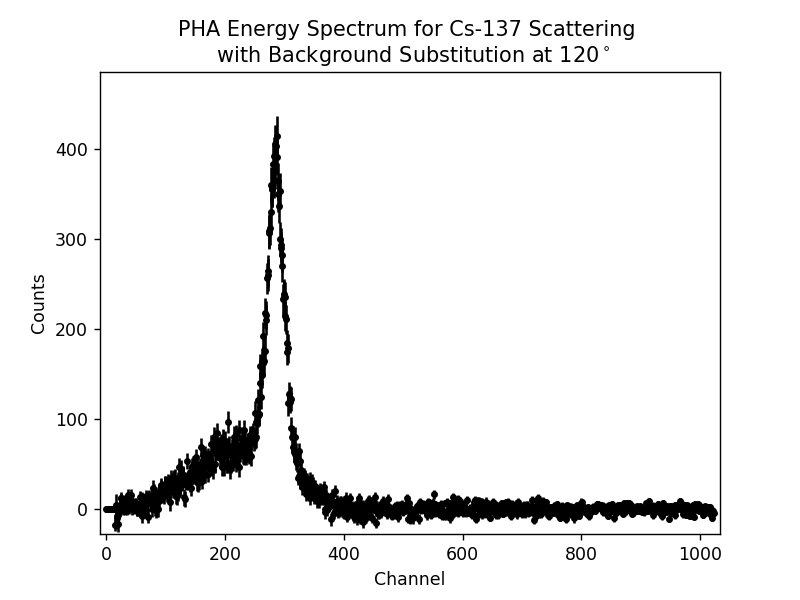

In [59]:
#Plots the background subtracted spectrum

fig = plt.figure()
ax = fig.add_subplot(111)
ax.errorbar(channel, N_bkg_sub, dN_bkg_sub, fmt='k.')
ax.axis([min(channel)-10,max(channel)+10,min(N_bkg_sub)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitution at 120$^\\circ$')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')

plt.savefig('Exp2_120_scatt_0512_bkg_sub.pdf')
plt.show()

Converged with chi-squared 29.933023167106985
Number of degrees of freedom, dof = 37
Reduced chi-squared  0.8090006261380266
Inital guess values:
  p0 = [5000.0, 300.0, 20.0]
Best fit values:
  pf = [1.60811224e+04 2.84888004e+02 1.60282405e+01]
Uncertainties in the best fit values:
  pferr = [243.64083041337332, 0.22046291393143835, 0.3384863037880398]


<IPython.core.display.Javascript object>


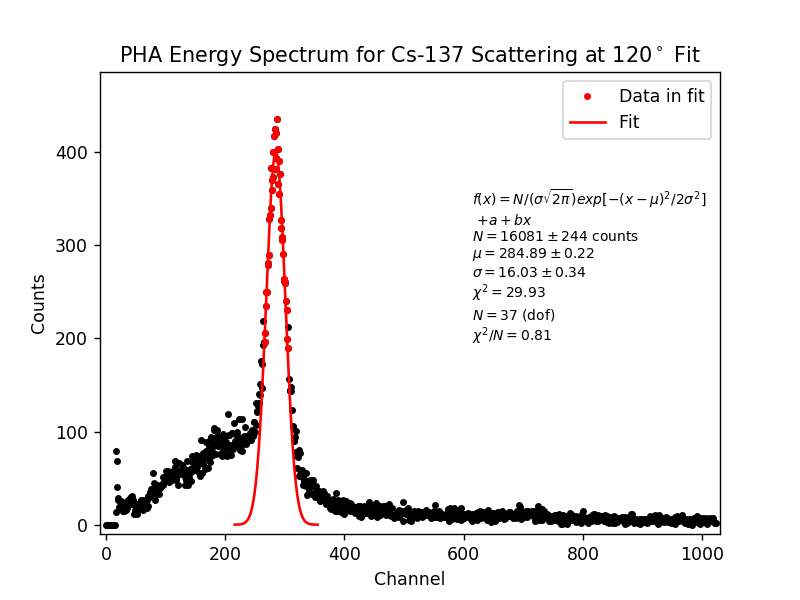

In [60]:
def fitfunc(p,x):
    return (p[0]/(p[2]*np.sqrt(2*np.pi)))*np.exp(-(x-p[1])**2/((p[2]**2)*2))
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [5000., 300., 20.]


b=266
t=306

channel2 = channel[b:t]
N2 = N[b:t]
dN2 = dN[b:t]
pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(channel2, N2, dN2),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(channel2) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(channel, N, 'k.')
ax.plot(channel2, N2, 'r.', label='Data in fit')

    
# We then plot the fit function. We could plot it at each point in "channel2"
#  and connect those points with straight lines. However, we may want a smoother
#  plot. To do so, we create a new array of points using "linspace()" that covers
#  the same range, but more densely. When we connect these points, the line will
#  be more smooth.
CHANNEL = np.linspace(min(channel2)-50, max(channel2)+50, 5000)
ax.plot(CHANNEL, fitfunc(pf, CHANNEL), 'r-', label='Fit')

ax.axis([-10,1030,min(N)-10,max(N)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering at 120$^\\circ$ Fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.legend()

textfit1 = '$f(x) = N/( \\sigma\\sqrt{2\\pi})exp[-(x-\\mu)^2/2\\sigma^2]$ \n $+a+bx$ \n' \
               '$N = %.0f \pm %.0f$ counts \n' \
               '$\\mu = %.2f \pm %.2f$\n' \
               '$\\sigma = %.2f \pm %.2f$ \n' \
                '$\chi^2= %.2f$ \n' \
               '$N = %i$ (dof) \n' \
               '$\chi^2/N = %.2f$' \
                % (pf[0], pferr[0], pf[1], pferr[1], pf[2], pferr[2], chisq, dof, chisq/dof)
ax.text(0.6, .75, textfit1, transform=ax.transAxes, fontsize=8,
             verticalalignment='top')

plt.savefig('Exp2_120_scatt_0512_fit.pdf')
plt.show()

Converged with chi-squared 84.7914390978457
Number of degrees of freedom, dof = 85
Reduced chi-squared  0.9975463423275964
Inital guess values:
  p0 = [5000.0, 300.0, 30.0, 100.0, 2.0]
Best fit values:
  pf = [-1.12311075e+04  2.85541543e+02 -1.38953807e+01  2.19845400e+02
 -5.70729709e-01]
Uncertainties in the best fit values:
  pferr = [366.8644372255942, 0.2635514658143919, 0.33296937403503446, 30.97008504316307, 0.09306192654478156]


<IPython.core.display.Javascript object>


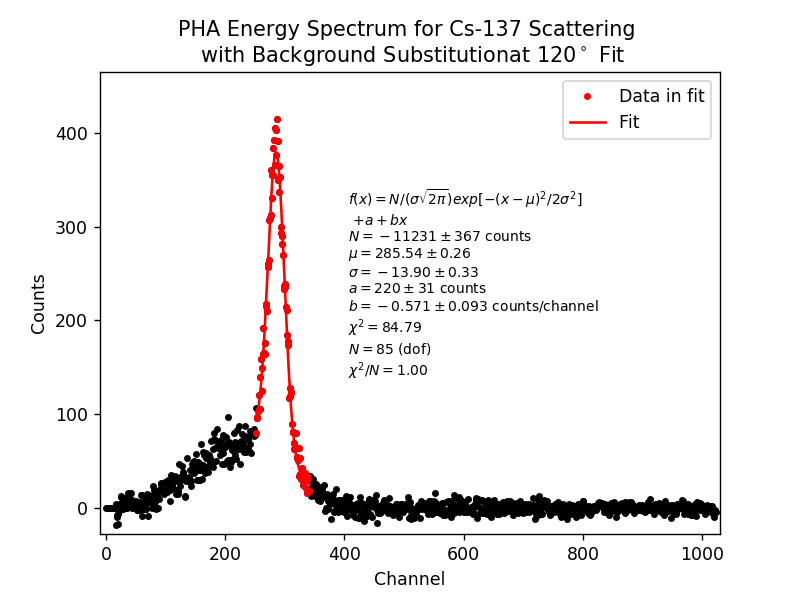

In [61]:
def fitfunc(p,x):
    return (p[0]/(p[2]*np.sqrt(2*np.pi)))*np.exp(-(x-p[1])**2/((p[2]**2)*2))+p[3]+p[4]*x
def residual(p, x, y, err):
    return (fitfunc(p, x)-y)/err

p0 = [5000., 300., 30., 100., 2.0]


b=252
t=342

channel2 = channel[b:t]
N2 = N_bkg_sub[b:t]
dN2 = dN_bkg_sub[b:t]
pf, cov, info, mesg, success = optimize.leastsq(residual, p0, args=(channel2, N2, dN2),
                                                full_output=1)

if cov is None:
    print('Fit did not converge')
    print('Success code:', success)
    print(mesg)
else:
    chisq = sum(info['fvec']*info['fvec'])
    dof = len(channel2) - len(pf)
    pferr = [np.sqrt(cov[i,i]) for i in range(len(pf))]
    print('Converged with chi-squared', chisq)
    print('Number of degrees of freedom, dof =', dof)
    print('Reduced chi-squared ', chisq/dof)
    print('Inital guess values:')
    print('  p0 =', p0)
    print('Best fit values:')
    print('  pf =', pf)
    print('Uncertainties in the best fit values:')
    print('  pferr =', pferr)
    
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(channel, N_bkg_sub, 'k.')
ax.plot(channel2, N2, 'r.', label='Data in fit')

    
# We then plot the fit function. We could plot it at each point in "channel2"
#  and connect those points with straight lines. However, we may want a smoother
#  plot. To do so, we create a new array of points using "linspace()" that covers
#  the same range, but more densely. When we connect these points, the line will
#  be more smooth.
CHANNEL = np.linspace(min(channel2), max(channel2), 5000)
ax.plot(CHANNEL, fitfunc(pf, CHANNEL), 'r-', label='Fit')

ax.axis([-10,1030,min(N_bkg_sub)-10,max(N_bkg_sub)+50])
ax.set_title('PHA Energy Spectrum for Cs-137 Scattering \n with Background Substitutionat 120$^\\circ$ Fit')
ax.set_xlabel('Channel')
ax.set_ylabel('Counts')
ax.legend()

textfit1 = '$f(x) = N/( \\sigma\\sqrt{2\\pi})exp[-(x-\\mu)^2/2\\sigma^2]$ \n $+a+bx$ \n' \
               '$N = %.0f \pm %.0f$ counts \n' \
               '$\\mu = %.2f \pm %.2f$\n' \
               '$\\sigma = %.2f \pm %.2f$ \n' \
               '$a = %.0f \pm %.0f$ counts \n' \
               '$b = %.3f \pm %.3f$ counts/channel \n' \
                '$\chi^2= %.2f$ \n' \
               '$N = %i$ (dof) \n' \
               '$\chi^2/N = %.2f$' \
                % (pf[0], pferr[0], pf[1], pferr[1], pf[2], pferr[2], 
                   pf[3], pferr[3], pf[4], pferr[4], chisq, dof, chisq/dof)
ax.text(0.4, .75, textfit1, transform=ax.transAxes, fontsize=8,
             verticalalignment='top')

plt.savefig('Exp2_120_scatt_0512_bkg_sub_fit.pdf')
plt.show()